<a href="https://colab.research.google.com/github/ArturHugo/PLN-2022-1/blob/main/Atividade06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
#!pip install keras
#!pip install tensorflow

In [49]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

In [50]:
path_train = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013train-A.txt'
path_test = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013test-A.txt'
path_valid = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013dev-A.txt'

In [51]:
df_train = pd.read_csv(path_train,names=['id','polarity','text'],sep='\t')
df_valid = pd.read_csv(path_valid,names=['id','polarity','text'],sep='\t')
df_test = pd.read_csv(path_test,names=['id','polarity','text'],sep='\t')

In [52]:
df_test

,id,polarity,text
0,264238274963451904,positive,"@jjuueellzz down in the Atlantic city, ventnor..."
1,218775148495515649,positive,Musical awareness: Great Big Beautiful Tomorro...
2,258965201766998017,neutral,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...
3,262926411352903682,negative,"Kapan sih lo ngebuktiin,jan ngomong doang Susa..."
4,171874368908050432,neutral,"Excuse the connectivity of this live stream, f..."
...,...,...,...
3542,264233437060288512,negative,Khaleda Zia's present India visit may have a b...
3543,263779058284904448,neutral,"FYI, golf fans: @jameslepp will join Moj on We..."
3544,250744453831213056,negative,@__Aniko you think mr.Calle let practice with ...
3545,258679974591090688,positive,Don't hide under your desk! It's just a salsa ...


In [53]:
print(f'Train size {df_train.shape}')
print(f'Valid size {df_valid.shape}')
print(f'Test size {df_test.shape}')

Train size (9684, 3)
Valid size (1654, 3)
Test size (3547, 3)


In [54]:
df_train = df_train.drop(labels=['id'],axis=1)
df_valid = df_valid.drop(labels=['id'],axis=1)
df_test = df_test.drop(labels=['id'],axis=1)

In [55]:
vectorizer = TfidfVectorizer(norm=None,lowercase=True,stop_words="english",max_df=0.95,min_df=2)

vectorizer.fit(df_train['text'])

tfidf_train = vectorizer.transform(df_train['text']).toarray()
tfidf_valid = vectorizer.transform(df_valid['text']).toarray()
tfidf_test = vectorizer.transform(df_test['text']).toarray()

In [56]:
df_train['polarity'] = pd.Categorical(df_train['polarity'])
y_train_int = df_train['polarity'].cat.codes

df_valid['polarity'] = pd.Categorical(df_valid['polarity'])
y_valid_int = df_valid['polarity'].cat.codes

df_test['polarity'] = pd.Categorical(df_test['polarity'])
y_test_int = df_test['polarity'].cat.codes

In [57]:
y_train = to_categorical(y_train_int)
y_valid = to_categorical(y_valid_int)
y_test = to_categorical(y_test_int)

In [58]:
X_train = tfidf_train
X_valid = tfidf_valid
X_test = tfidf_test

In [59]:
N = tfidf_train.shape[0]
vocab_size = tfidf_train.shape[1]
print(f'Quantidade de instancias de treinamento {N} e tamanho do vocabulario {vocab_size}')

Quantidade de instancias de treinamento 9684 e tamanho do vocabulario 7654


Arquitetura da Rede Multilayer Perceptron Profunda

Hyperparâmetros da rede

In [60]:
number_of_neurons_layer1 = 20
number_of_neurons_layer2 = 10
number_of_neurons_output = 3
lr = 0.01

In [61]:
model = Sequential()
# Input Layer
model.add(Dense(number_of_neurons_layer1,input_dim=vocab_size,activation='sigmoid'))
model.add(Dense(number_of_neurons_layer2,activation='sigmoid'))
model.add(Dense(number_of_neurons_output,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                153100    
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 3)                 33        
                                                                 
Total params: 153,343
Trainable params: 153,343
Non-trainable params: 0
_________________________________________________________________


In [62]:
sgd = SGD(learning_rate=lr)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [63]:
history = model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=50)

Epoch 1/50
303/303 [==============================] - 2s 4ms/step - loss: 1.0392 - accuracy: 0.4365 - val_loss: 1.0581 - val_accuracy: 0.4468
Epoch 2/50
303/303 [==============================] - 1s 4ms/step - loss: 1.0029 - accuracy: 0.4736 - val_loss: 1.0594 - val_accuracy: 0.4468
Epoch 3/50
303/303 [==============================] - 1s 4ms/step - loss: 0.9996 - accuracy: 0.4736 - val_loss: 1.0555 - val_accuracy: 0.4468
Epoch 4/50
303/303 [==============================] - 1s 4ms/step - loss: 0.9963 - accuracy: 0.4737 - val_loss: 1.0543 - val_accuracy: 0.4468
Epoch 5/50
303/303 [==============================] - 1s 4ms/step - loss: 0.9926 - accuracy: 0.4742 - val_loss: 1.0520 - val_accuracy: 0.4480
Epoch 6/50
303/303 [==============================] - 1s 4ms/step - loss: 0.9884 - accuracy: 0.4764 - val_loss: 1.0490 - val_accuracy: 0.4547
Epoch 7/50
303/303 [==============================] - 1s 4ms/step - loss: 0.9838 - accuracy: 0.4835 - val_loss: 1.0456 - val_accuracy: 0.4528
Epoch 

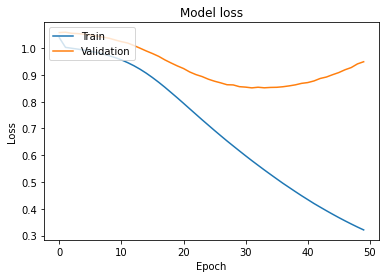

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

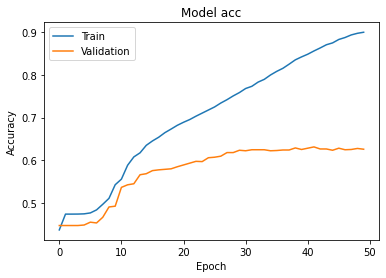

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Avaliação com os Dados de Teste

In [66]:
y = model.evaluate(X_test,y_test)

111/111 [==============================] - 0s 3ms/step - loss: 0.9381 - accuracy: 0.6408


In [67]:
import numpy as np
y_prob = model.predict(X_test)
y_prob

array([[0.06624601, 0.5197117 , 0.41404232],
       [0.0199981 , 0.006618  , 0.9733839 ],
       [0.03443187, 0.9140783 , 0.05148987],
       ...,
       [0.11569069, 0.6493298 , 0.23497958],
       [0.27296588, 0.10368748, 0.6233467 ],
       [0.1194667 , 0.51182294, 0.3687103 ]], dtype=float32)

In [68]:
y_pred = np.argmax(y_prob,axis=1)
y_pred

array([1, 2, 1, ..., 1, 2, 1])

In [69]:
y_test_int

0       2
1       2
2       1
3       0
4       1
       ..
3542    0
3543    1
3544    0
3545    2
3546    1
Length: 3547, dtype: int8

In [70]:
confusion_matrix = np.zeros((3,3))
true_0_classified_0 = np.sum((y_test_int == 0)*(y_pred == 0))
true_0_classified_1 = np.sum((y_test_int == 0)*(y_pred == 1))
true_0_classified_2 = np.sum((y_test_int == 0)*(y_pred == 2))

true_1_classified_0 = np.sum((y_test_int == 1)*(y_pred == 0))
true_1_classified_1 = np.sum((y_test_int == 1)*(y_pred == 1))
true_1_classified_2 = np.sum((y_test_int == 1)*(y_pred == 2))

true_2_classified_0 = np.sum((y_test_int == 2)*(y_pred == 0))
true_2_classified_1 = np.sum((y_test_int == 2)*(y_pred == 1))
true_2_classified_2 = np.sum((y_test_int == 2)*(y_pred == 2))

confusion_matrix[0][0] = true_0_classified_0
confusion_matrix[0][1] = true_0_classified_1
confusion_matrix[0][2] = true_0_classified_2

confusion_matrix[1][0] = true_1_classified_0
confusion_matrix[1][1] = true_1_classified_1
confusion_matrix[1][2] = true_1_classified_2

confusion_matrix[2][0] = true_2_classified_0
confusion_matrix[2][1] = true_2_classified_1
confusion_matrix[2][2] = true_2_classified_2

confusion_matrix

array([[ 109.,  320.,  130.],
       [  23., 1220.,  270.],
       [  35.,  496.,  944.]])

In [73]:
confusion_matrix = np.zeros((3,3))
for i in range(0,len(y_pred)):
  confusion_matrix[y_test_int[i]][y_pred[i]] += 1

confusion_matrix

array([[ 109.,  320.,  130.],
       [  23., 1220.,  270.],
       [  35.,  496.,  944.]])

In [74]:
acc = 0
for i in range(0,3):
  acc += confusion_matrix[i][i]

acc /= np.sum(confusion_matrix)
acc

0.6408232308993516

In [75]:
def get_precision(confusion_matrix, label):
  return np.sum(confusion_matrix[:][label])/np.sum(confusion_matrix)

def get_recall(confusion_matrix, label):
  return np.sum(confusion_matrix[label][:])/np.sum(confusion_matrix)

In [94]:
precisions = []
for i in range(0,3):
  precisions.append(get_precision(confusion_matrix, i))
precisions = np.array(precisions)

recalls = []
for i in range(0,3):
  recalls.append(get_recall(confusion_matrix, i))
recalls = np.array(recalls)

supports = []
for i in range(0,3):
  supports.append(np.sum(confusion_matrix[i][:]))
supports = np.array(supports)

print("  Precision \t Recall \t F1-score \t Support")
f1_scores = []
for i in range(0,3):
  f1_scores.append(precisions[i]*recalls[i]/(precisions[i]+recalls[i]))
  print(f"{i}   {precisions[i]:.2f} \t  {recalls[i]:.2f} \t\t   {f1_scores[i]:.2f} \t   {supports[i]:.0f}")

f1_scores = np.array(f1_scores)

  Precision 	 Recall 	 F1-score 	 Support
0   0.16 	  0.16 		   0.08 	   559
1   0.43 	  0.43 		   0.21 	   1513
2   0.42 	  0.42 		   0.21 	   1475


In [95]:
avg_precision = np.sum(precisions*supports)/np.sum(supports)
avg_recall = np.sum(recalls*supports)/np.sum(supports)
avg_f1_score = np.sum(f1_scores*supports)/np.sum(supports)

print(f"Average precision: {avg_precision:.2f}")
print(f"Average recall:    {avg_recall:.2f}")
print(f"Average f1-score:  {avg_f1_score:.2f}")

Average precision: 0.38
Average recall:    0.38
Average f1-score:  0.19
